In [1]:
import pandas as pd
x = [[20210401.0,'Won'], [20210402.0,'Lost'], [20210403.0,'Lost'], [20210404.0,'Won']]
df = pd.DataFrame(x, columns = ['item_date','status'])
df['item_date'] = pd.to_datetime(df['item_date'].dropna().astype('int').astype('str'), 
                                 format = '%Y%m%d', errors= 'coerce')
df['item_date'] = df['item_date'].dt.strftime('%d/%m/%Y') 
print(df.head(2))

    item_date status
0  01/04/2021    Won
1  02/04/2021   Lost


In [1]:
import pandas as pd
df_raw = pd.read_excel('Copper_Set.xlsx')

In [2]:
df_raw.shape

(181673, 14)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
def extract_date_ymd(df_raw, col_name, prefix=None):
    prefix = prefix or col_name

    # Convert column to string safely (padded int format like YYYYMMDD expected)
    df_raw[col_name] = pd.to_numeric(df_raw[col_name], errors='coerce')

    # Convert directly to datetime (pandas handles NaN)
    df_raw[f'{prefix}_datetime'] = pd.to_datetime(
        df_raw[col_name].astype('Int64').astype(str),
        format='%Y%m%d', errors= 'coerce')
    
    df_raw[f'{prefix}_year'] = df_raw[f'{prefix}_datetime'].dt.year.astype('Int64')
    df_raw[f'{prefix}_month'] = df_raw[f'{prefix}_datetime'].dt.month.astype('Int64')
    df_raw[f'{prefix}_day'] = df_raw[f'{prefix}_datetime'].dt.day.astype('Int64')

    return df_raw.head(2)



In [5]:
extract_date_ymd(df_raw, 'item_date')

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_datetime,item_date_year,item_date_month,item_date_day
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0,2021-04-01,2021,4,1
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0,2021-04-01,2021,4,1


In [6]:
extract_date_ymd(df_raw, 'delivery date')

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,...,delivery date,selling_price,item_date_datetime,item_date_year,item_date_month,item_date_day,delivery date_datetime,delivery date_year,delivery date_month,delivery date_day
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,...,20210701.0,854.0,2021-04-01,2021,4,1,2021-07-01,2021,7,1
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,...,20210401.0,1047.0,2021-04-01,2021,4,1,2021-04-01,2021,4,1


In [10]:
df_raw['material_ref'].nunique()

16563

In [12]:
df_raw['material_ref'].value_counts().reset_index().rename(columns={'index': 'Category', 'material_ref': 'Count'})


,Count,count
0,DX51D+Z,922
1,G9010,856
2,DC01 RED.FLAT KUCHNIA EKO 2.2,777
3,DC01,725
4,G9006,671
...,...,...
16558,2X53A100L6FSA,1
16559,2340B100L6FSA,1
16560,PEA1265X595SP,1
16561,NBW_L+_A_1125_0.4,1


In [7]:
import numpy as np
df_raw['material_ref'] = df_raw['material_ref'].apply(lambda x : np.nan if str(x).startswith('000000') else x)


In [8]:
df_raw['material_ref'] = df_raw['material_ref'].fillna('unknown')

In [9]:
df_new  = df_raw[df_raw['status'].isin(['Won','Lost'])| df_raw['status'].isna()].copy()

In [10]:
df_new.shape

(150450, 22)

In [ ]:
df_new['material_ref'].value_counts() #

material_ref
unknown                           82418
DX51D+Z                             851
DC01 RED.FLAT KUCHNIA EKO 2.2       776
G9010                               623
DC01                                600
                                  ...  
890AN2932                             1
EKO HC180CS 0,80X 909                 1
EKO HC180CS 0,90X 912                 1
0,97X1175 HC180 NET MAX 7T EKO        1
19076 +/- RAL 9010                    1
Name: count, Length: 10871, dtype: int64

In [ ]:
df_new.isna().sum() #

id                        1
item_date                 1
quantity tons             0
customer                  1
country                   4
status                    2
item type                 0
application               3
thickness                 0
width                     0
material_ref              0
product_ref               0
delivery date             1
selling_price             1
item_date_datetime        3
item_date_year            3
item_date_month           3
item_date_day             3
delivery date_datetime    2
delivery date_year        2
delivery date_month       2
delivery date_day         2
dtype: int64

In [11]:
df_new['quantity tons'] = pd.to_numeric(df_new['quantity tons'],errors='coerce')

In [18]:
neg = (df_new['quantity tons']<0).sum()
print(neg)

3


In [12]:
df_new  = df_new[(df_new['quantity tons']>0 ) & (df_new['selling_price']>0)]

In [13]:
df_new.duplicated().sum()  # Check duplicate rows

np.int64(0)

In [14]:
df_new.isna().sum()

id                        1
item_date                 1
quantity tons             0
customer                  1
country                   4
status                    2
item type                 0
application               3
thickness                 0
width                     0
material_ref              0
product_ref               0
delivery date             1
selling_price             0
item_date_datetime        3
item_date_year            3
item_date_month           3
item_date_day             3
delivery date_datetime    2
delivery date_year        2
delivery date_month       2
delivery date_day         2
dtype: int64

In [15]:
df_new.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,...,delivery date,selling_price,item_date_datetime,item_date_year,item_date_month,item_date_day,delivery date_datetime,delivery date_year,delivery date_month,delivery date_day
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,...,20210701.0,854.00,2021-04-01,2021,4,1,2021-07-01,2021,7,1
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,...,20210401.0,1047.00,2021-04-01,2021,4,1,2021-04-01,2021,4,1
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,...,20210101.0,644.33,2021-04-01,2021,4,1,2021-01-01,2021,1,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,...,20210101.0,768.00,2021-04-01,2021,4,1,2021-01-01,2021,1,1
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,...,20210301.0,577.00,2021-04-01,2021,4,1,2021-03-01,2021,3,1


In [ ]:
df_new[['country','status','application']].mode()

,country,status,application
0,78.0,Won,10.0


In [16]:
df_new['country'].isna().all()

np.False_

In [17]:
df_new['country'].isna().sum()

np.int64(4)

In [16]:
cols_to_impute = ['country','status','application']   
for col in cols_to_impute :
    mode_value = df_new[col].mode(dropna=True)
    if not mode_value.empty:
         df_new[col] = df_new[col].fillna(mode_value[0])


In [22]:
df_new['status'].isna().sum()

np.int64(0)

In [23]:
df_new['application'].isna().sum()

np.int64(0)

In [17]:
for i in ['customer','country','application','product_ref']:
    df_new[i] = df_new[i].astype('object')

In [18]:
num_columns = df_new.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(num_columns)

['item_date', 'quantity tons', 'thickness', 'width', 'delivery date', 'selling_price', 'item_date_year', 'item_date_month', 'item_date_day', 'delivery date_year', 'delivery date_month', 'delivery date_day']


In [19]:
num_columns_list = ['quantity tons', 'thickness', 'width', 'selling_price']
oldskew = df_new[num_columns_list].skew()
oldskew

quantity tons     53.803396
thickness         17.118513
width              0.352714
selling_price    141.497815
dtype: float64

In [26]:
print(num_columns_list)
print(type(num_columns_list))

        quantity tons  thickness   width  selling_price
0           54.151139       2.00  1500.0         854.00
1          768.024839       0.80  1210.0        1047.00
2          386.127949       0.38   952.0         644.33
3          202.411065       2.30  1317.0         768.00
4          785.526262       4.00  2000.0         577.00
...               ...        ...     ...            ...
181667     106.783299       0.96  1240.0         602.00
181668     102.482422       0.96  1220.0         591.00
181669     208.086469       0.95  1500.0         589.00
181670       4.235594       0.71  1250.0         619.00
181672     406.686538       0.71  1240.0         607.00

[150440 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [20]:
num_columns_list = list(num_columns_list) if not isinstance(num_columns_list, list) else num_columns_list


In [ ]:
df_new[num_columns_list] = df_new[num_columns_list].apply(pd.to_numeric, errors='coerce') #skip
df_new = df_new.dropna(subset=num_columns_list, how='all')

In [21]:
df_new[num_columns_list] = df_new[num_columns_list].apply(lambda col: pd.to_numeric(col, errors='coerce'))
df_new = df_new.dropna(subset=num_columns_list, how='all')


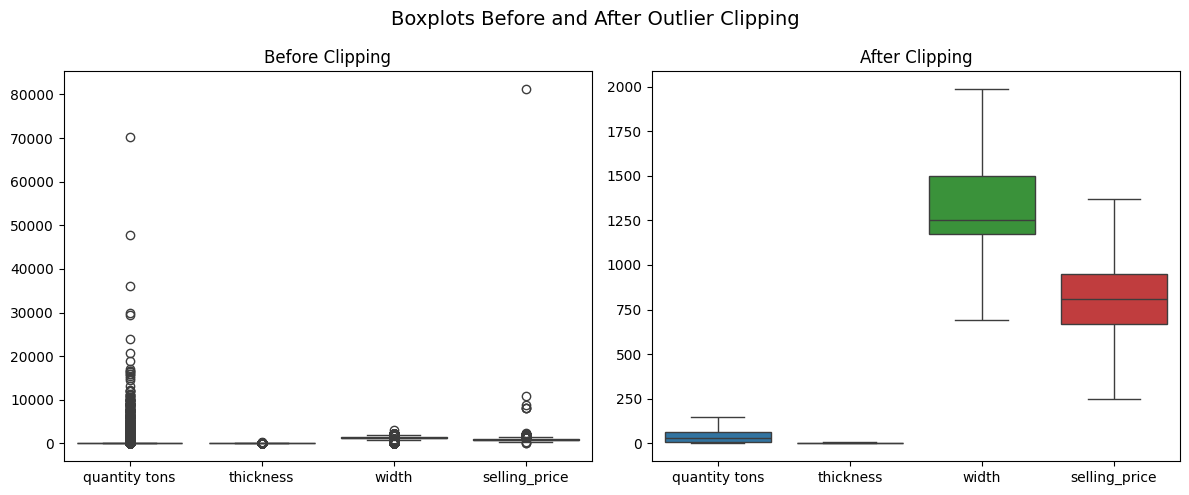

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.suptitle("Boxplots Before and After Outlier Clipping", fontsize=14)

plt.subplot(1, 2, 1)
sns.boxplot(data=df_new[num_columns_list])
plt.title("Before Clipping")


df_clean = df_new.copy()
for col in num_columns_list:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean[col] = df_clean[col].clip(lower, upper)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean[num_columns_list])
plt.title("After Clipping")    

plt.tight_layout()
plt.show()

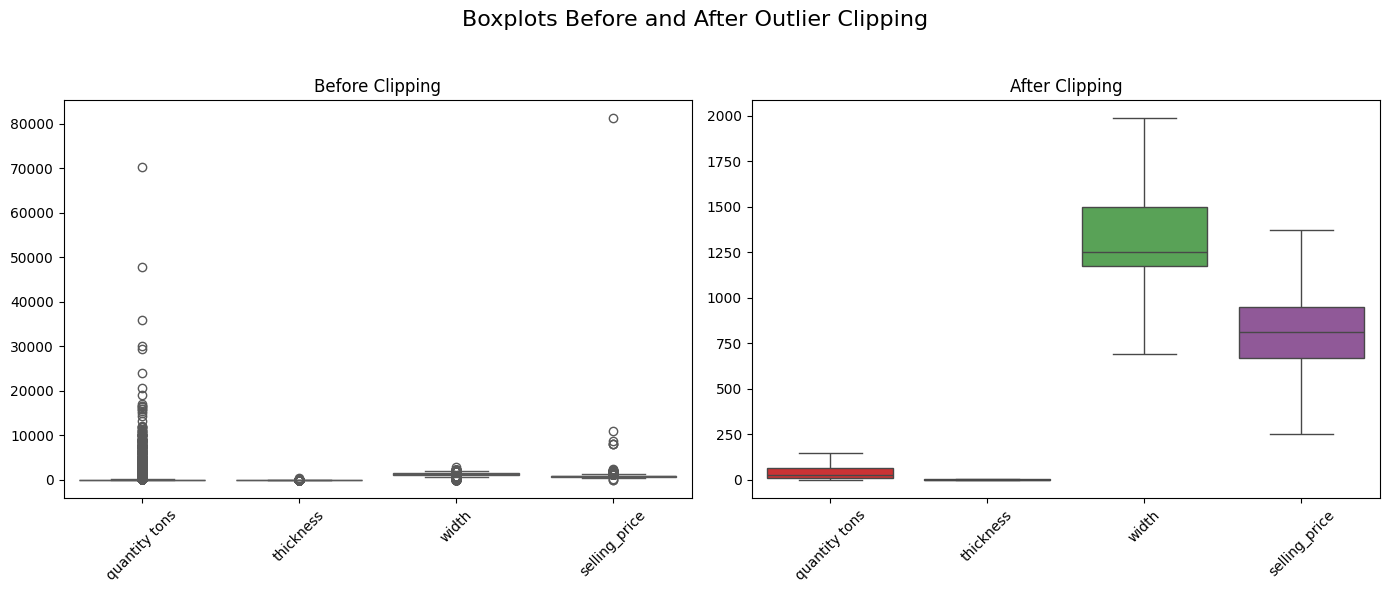

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
plt.suptitle("Boxplots Before and After Outlier Clipping", fontsize=16)

plt.subplot(1, 2, 1)
sns.boxplot(data=df_new[num_columns_list], palette="Set2")
plt.title("Before Clipping")
plt.xticks(rotation=45) 

#  Clipping Outliers
df_clean = df_new.copy()
for col in num_columns_list:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean[col] = df_clean[col].clip(lower, upper)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean[num_columns_list], palette="Set1")
plt.title("After Clipping") 
plt.xticks(rotation=45) 

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

In [23]:
from scipy.stats import boxcox
df_trans = df_clean.copy()
for col in num_columns_list:
   if (df_clean[col] > 0).all():
      skewness = df_clean[col].skew()
      if abs(skewness) > 0.5:
         df_trans[col], _ = boxcox(df_clean[col] + 1e-9)
      else:
         df_trans[col] = df_clean[col]
   else:
      df_trans[col] = df_clean[col]      
     

In [24]:
new_skew = df_trans[num_columns_list].skew()
print("Skewness after Box-Cox:\n", new_skew)

Skewness after Box-Cox:
 quantity tons   -0.059547
thickness        0.017617
width            0.011423
selling_price    0.451643
dtype: float64


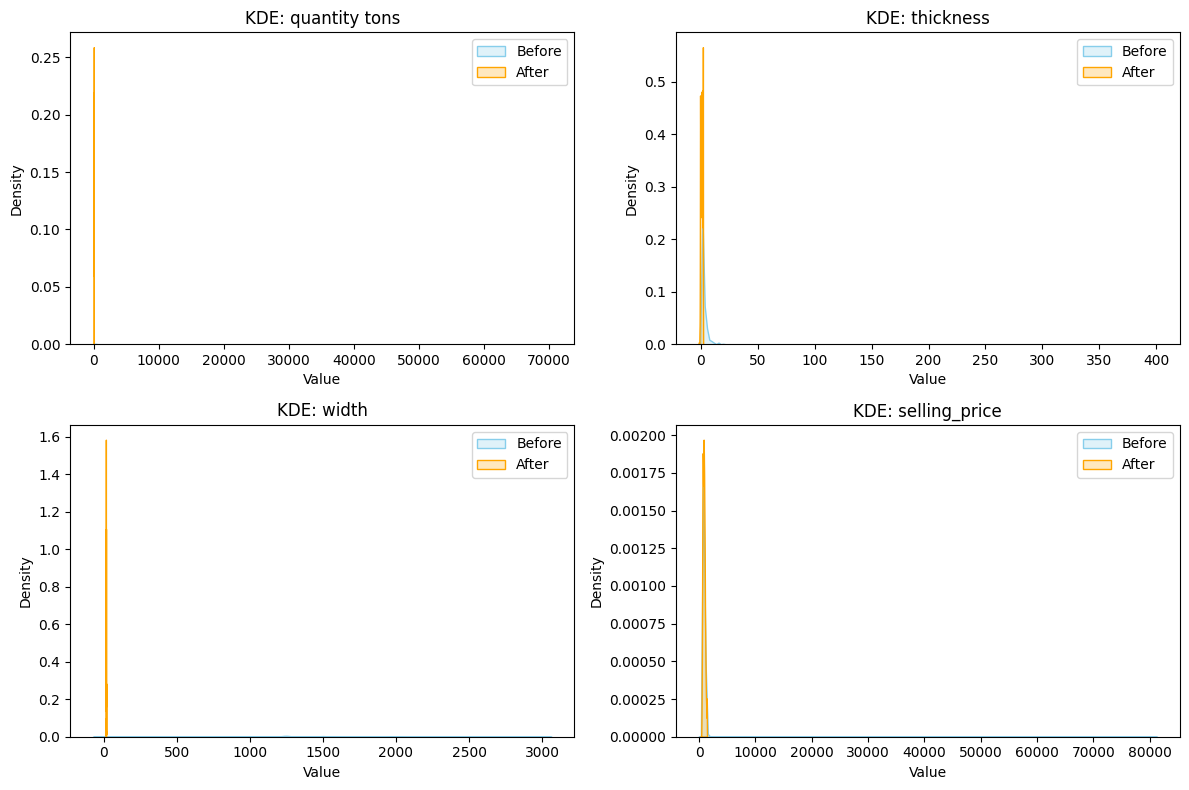

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(num_columns_list):
    sns.kdeplot(df_new[col], fill=True, label='Before', color='skyblue', ax=axes[i])
    sns.kdeplot(df_trans[col], fill=True, label='After', color='orange', ax=axes[i])
    
    axes[i].set_title(f'KDE: {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()
plt.tight_layout()
plt.show()    

In [25]:
def skewness_plots(df_sam, cols, title):
        fig, axes = plt.subplots(1,len(cols), figsize = (5*len(cols),5))
        fig.suptitle(title, fontsize = 16)
        for i,col in enumerate(cols):
                sns.kdeplot(data = df_sam[col],ax= axes[i], fill=True, color='skyblue')
                axes[i].set_title(col)
        plt.tight_layout()
        plt.show()

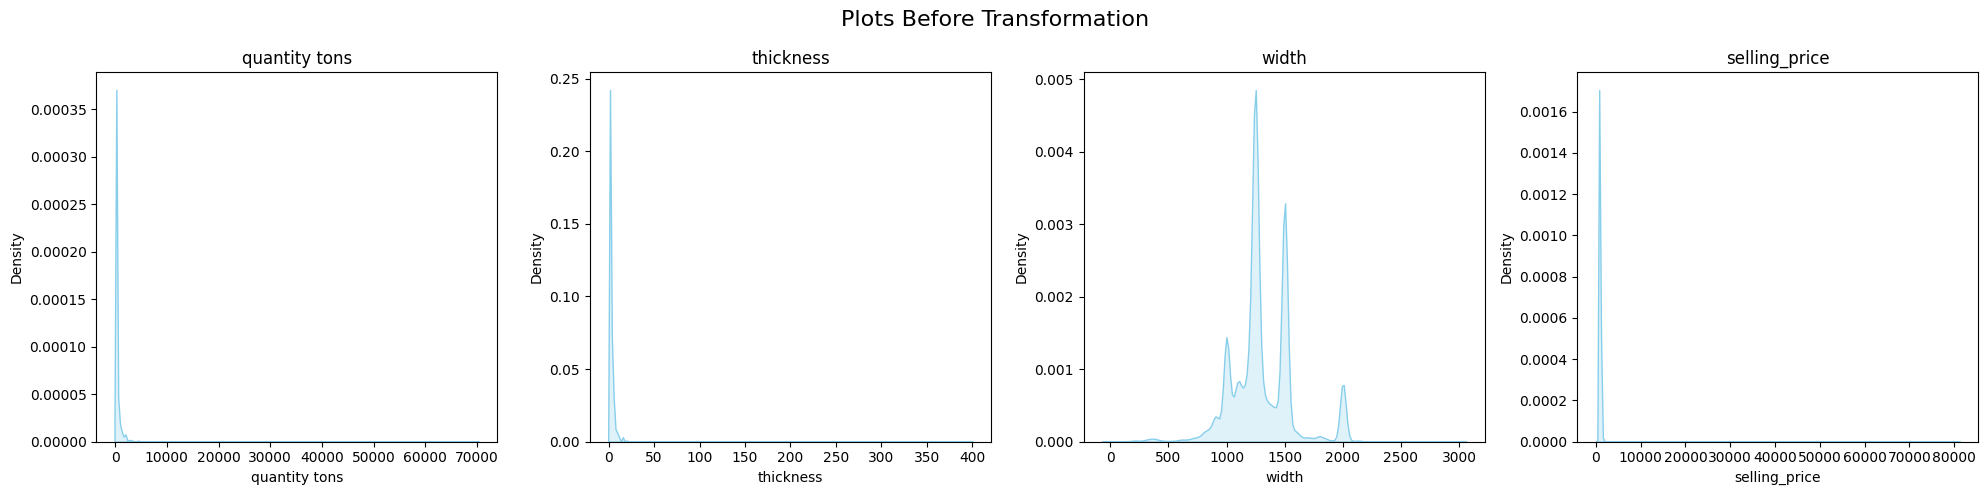

In [26]:
skewness_plots(df_new, num_columns_list, "Plots Before Transformation")

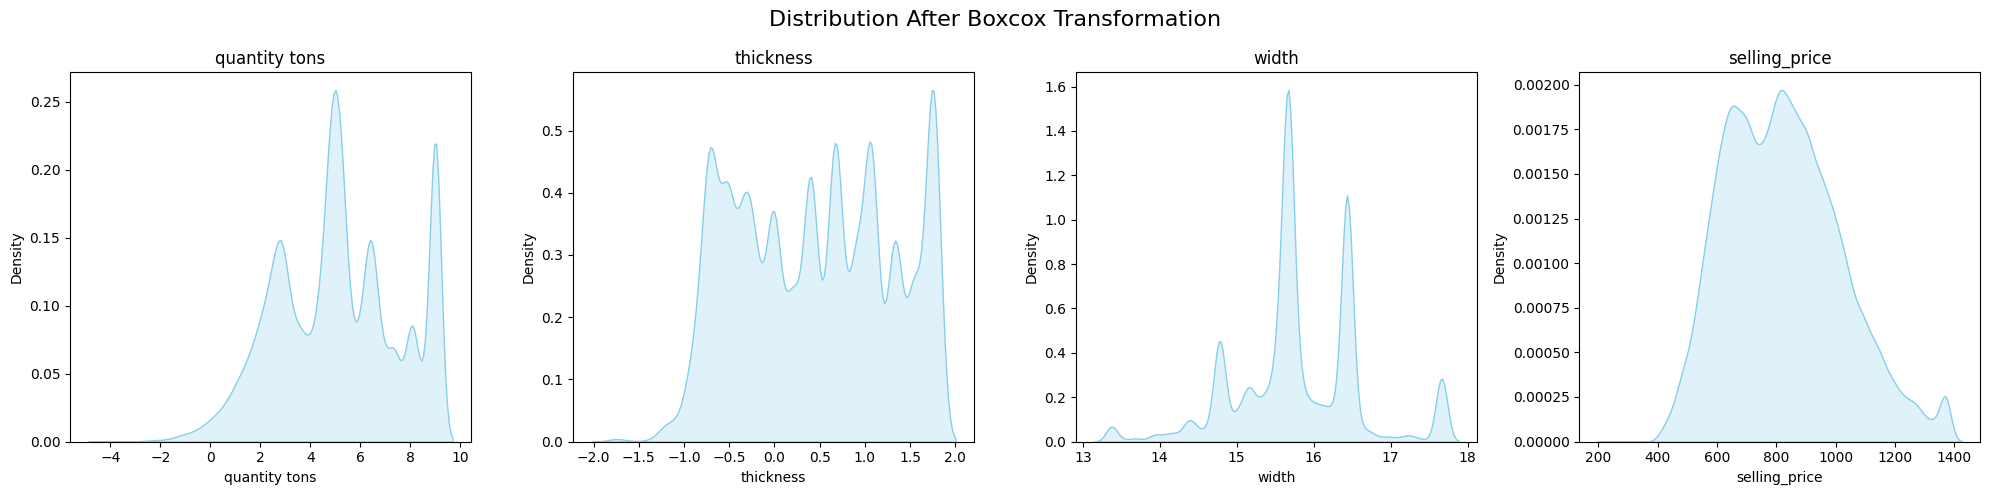

In [27]:
skewness_plots(df_trans, num_columns_list, "Distribution After Boxcox Transformation")

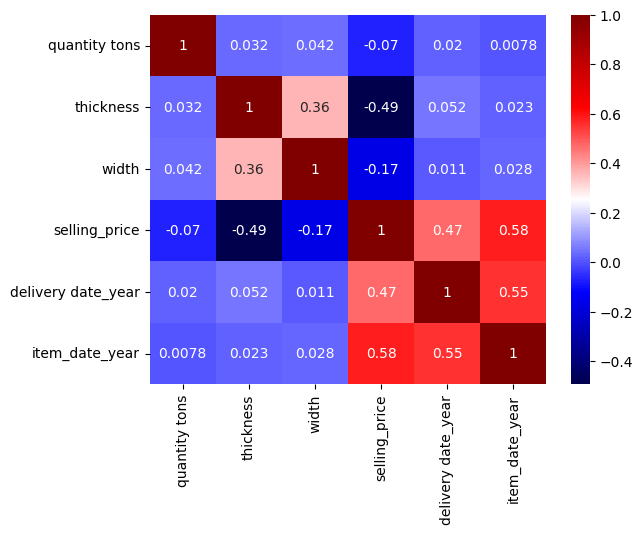

In [28]:
correlation_matrix = df_trans[['quantity tons','thickness','width','selling_price','delivery date_year','item_date_year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')
plt.show()

In [29]:
df_trans.isna().sum()

id                        1
item_date                 1
quantity tons             0
customer                  1
country                   0
status                    0
item type                 0
application               0
thickness                 0
width                     0
material_ref              0
product_ref               0
delivery date             1
selling_price             0
item_date_datetime        3
item_date_year            3
item_date_month           3
item_date_day             3
delivery date_datetime    2
delivery date_year        2
delivery date_month       2
delivery date_day         2
dtype: int64

In [30]:
df_trans.dropna(inplace=True)

In [31]:
df_trans.drop(['item_date','item_date_datetime','delivery date','delivery date_datetime',
               'id','customer','delivery date_month','delivery date_day', 'item_date_month', 'item_date_day'], axis=1, inplace=True)

In [32]:
df_trans['quantity tons'] = df_trans['quantity tons'].round(2)
df_trans['thickness'] = df_trans['thickness'].round(2)
df_trans['width'] = df_trans['width'].round(2)

In [33]:
df_trans.head(2) 

,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date_year,delivery date_year
0,6.37,28.0,Won,W,10.0,0.68,16.43,DEQ1 S460MC,1670798778,854.0,2021,2021
1,9.01,25.0,Won,W,41.0,-0.22,15.54,unknown,1668701718,1047.0,2021,2021


In [34]:
df_trans.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'material_ref', 'product_ref', 'selling_price',
       'item_date_year', 'delivery date_year'],
      dtype='object')

In [35]:
from scipy.stats import chi2_contingency
cat_cols = ['country', 'status', 'item type', 'application']
for col in cat_cols:
    contingency_table = pd.crosstab(df_trans[col], df_trans['status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi2 = {chi2:.4f}, p-value={p:.4e}, dof = {dof}")

country: chi2 = 13153.3920, p-value=0.0000e+00, dof = 16
status: chi2 = 150427.3346, p-value=0.0000e+00, dof = 1
item type: chi2 = 15595.5423, p-value=0.0000e+00, dof = 6
application: chi2 = 14507.3978, p-value=0.0000e+00, dof = 29


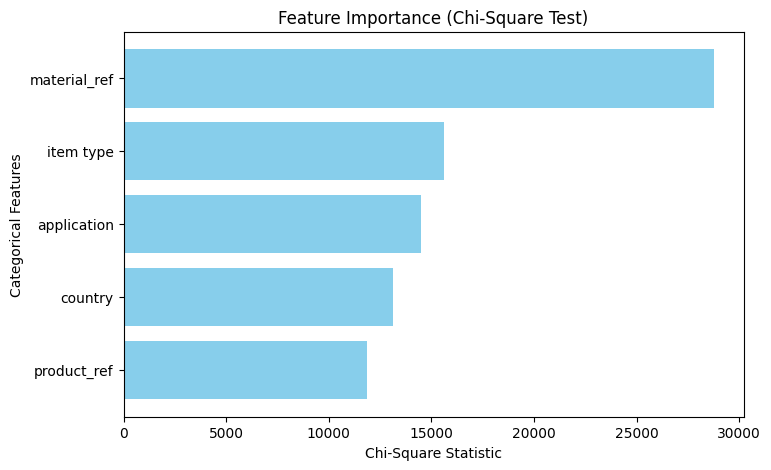

In [36]:
cat_cols = ['country', 'item type', 'application', 'material_ref', 'product_ref']
chi2_scores = {}

for col in cat_cols:
    contingency_table = pd.crosstab(df_trans[col], df_trans['status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_scores[col] = chi2
chi2_df = pd.DataFrame(list(chi2_scores.items()), columns=['Feature', 'Chi2'])
chi2_df = chi2_df.sort_values(by='Chi2', ascending=False)
plt.figure(figsize=(8,5))
plt.barh(chi2_df['Feature'], chi2_df['Chi2'], color="skyblue")
plt.xlabel("Chi-Square Statistic")
plt.ylabel("Categorical Features")
plt.title("Feature Importance (Chi-Square Test)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
catg_cols = ['id', 'customer', 'country', 'status', 'item type', 'application', 'material_ref', 'product_ref']
num_cols  = ['quantity tons','thickness','width','selling_price','delivery date_year','item_date_year']

In [29]:
df_trans['status'].value_counts()

status
Won     116003
Lost     34437
Name: count, dtype: int64

In [30]:
df_trans['status'].isna().sum()

np.int64(0)

In [29]:
df_trans['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [37]:
df_trans['product_ref'].unique()

array([1670798778, 1668701718, 628377, 640665, 611993, 1668701376,
       164141591, 1671863738, 1332077137, 640405, 1693867550, 1665572374,
       1282007633, 1668701698, 628117, 1690738206, 628112, 640400,
       1671876026, 164336407, 1665572032, 164337175, 611728, 1721130331,
       1693867563, 611733, 1690738219, 1722207579, 929423819, 1668701725,
       1665584320, 1665584642], dtype=object)

In [38]:
df_trans['material_ref'].unique()

array(['DEQ1 S460MC', 'unknown', 'S0380700', ..., 'MAS65270', 'MAS65550',
       '202006170005.IO.1.1'], shape=(10870,), dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
le_mat  = LabelEncoder()
df_trans['material_ref_encoded'] = le_mat.fit_transform(df_trans['material_ref'])
encoders['material_ref'] = le_mat

In [36]:
# astype(str) ensures safe encoding if any mixed type or NaN exists, converting everything to string
import pickle
catg_cols_encd = [ 'country', 'status', 'item type', 'application', 'product_ref']
for col in catg_cols_encd:
    le = LabelEncoder()
    df_trans[col] = le.fit_transform(df_trans[col].astype(str))
    encoders[col] = le
pickle.dump(encoders, open('encoders.pkl', 'wb'))

In [ ]:
print(df_trans[['material_ref','material_ref_encoded']].head())   # Referal cross check

              material_ref  material_ref_encoded
0              DEQ1 S460MC                  5099
1                  unknown                 10860
2                 S0380700                  9187
3  DX51D+ZM310MAO 2.3X1317                  5367
4          2_S275JR+AR-CL1                  1817


In [ ]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.7 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/8.7 MB 1.8 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.7 MB 1.9 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/8.7 MB 1.8 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.7 MB 1.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.4/8.7 MB 1.8 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.7 MB 1.7 MB/s eta 0:00:04
   -------------- ------------------------- 3.1/8.7 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.4/8.7 MB 1.7 MB/s eta 0:00:04
   ------------------ --------------------- 3.9/8.7 MB 1.7 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 1.7 MB/s eta 0:00:03
   --------------------- -


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install streamlit-option-menu


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


CLASSIFICATION MODEL - PREDICTING STATUS 

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
# Encoding Categorical-Target Feature : 
label_encoder  = LabelEncoder()
encoded_status = label_encoder.fit_transform(df_trans['status'])
df_trans['status'] = encoded_status

In [39]:
df_clsf = df_trans.copy() 

In [40]:
df_clsf.shape   # 6-Catg(Encode+status), 6-numeric

(150433, 13)

In [41]:
df_clsf['status'].value_counts()  # Handle Imbalance using Smote 

status
1    115998
0     34435
Name: count, dtype: int64

In [42]:
X = df_clsf.drop(['status','material_ref'], axis = 1)
y = df_clsf['status']

In [43]:
print(X.dtypes)

quantity tons           float64
country                   int64
item type                 int64
application               int64
thickness               float64
width                   float64
product_ref               int64
selling_price           float64
item_date_year            Int64
delivery date_year        Int64
material_ref_encoded      int64
dtype: object


In [44]:
for col in X.select_dtypes(include="Int64").columns:    # Handled Int64
    X[col] = X[col].fillna(-1).astype('int64')

In [ ]:
#Remove the things and copy to imc(rfc) remove label=false(xgb)

In [45]:
from imblearn.over_sampling import SMOTE

smote  = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
#X = df_clsf.drop(columns=['status','material_ref'])   # features
# y = df_clsf['status']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)
smote  = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train) 

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.925848373051484

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      6887
           1       0.96      0.94      0.95     23200

    accuracy                           0.93     30087
   macro avg       0.89      0.91      0.90     30087
weighted avg       0.93      0.93      0.93     30087


Confusion Matrix:
 [[ 6016   871]
 [ 1360 21840]]


In [ ]:
%pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 509.0 kB/s eta 0:01:51
   ---------------------------------------- 0.5/56.8 MB 509.0 kB/s eta 0:01:51
    --------------------------------------- 0.8/56.8 MB 599.2 kB/s eta 0:01:34
    --------------------------------------- 0.8/56.8 MB 599.2 kB/s eta 0:01:34
    --------------------------------------- 1.0/56.8 MB 637.3 kB/s eta 0:01:28
    --------------------------------------- 1.3/56.8 MB 699.0 kB/s eta 0:01:20
   - -------------------------------------- 1.6/56.8 MB 711.2 kB/s eta 0:01:18
   - -------------------------------------- 1.6/56.8 MB 711.2 kB/s eta 0:01:18
   - -------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)
smote  = SMOTE(random_state = 42)
X_train_res, y_train_res = smote.fit_resample(X_train,y_train)
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)
xgb_clf.fit(X_train_res, y_train_res)
y_pred = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8683816930900389

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      6887
           1       0.93      0.89      0.91     23200

    accuracy                           0.87     30087
   macro avg       0.81      0.84      0.82     30087
weighted avg       0.88      0.87      0.87     30087


Confusion Matrix:
 [[ 5406  1481]
 [ 2479 20721]]


In [48]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)
smote  = SMOTE(random_state = 42)
X_train_rsamp, y_train_rsamp = smote.fit_resample(X_train,y_train)
model = LogisticRegression()
model.fit(X_train_rsamp,y_train_rsamp)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6715524977565062

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.68      0.49      6887
           1       0.88      0.67      0.76     23200

    accuracy                           0.67     30087
   macro avg       0.63      0.68      0.62     30087
weighted avg       0.76      0.67      0.70     30087


Confusion Matrix:
 [[ 4713  2174]
 [ 7708 15492]]


h:\New\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    # Get predicted probabilities (for class 1)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC–AUC Curve: {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

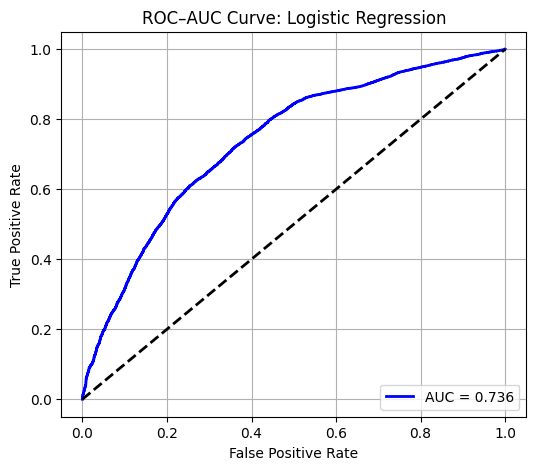

In [50]:
plot_roc_curve(model, X_test,y_test, "Logistic Regression")

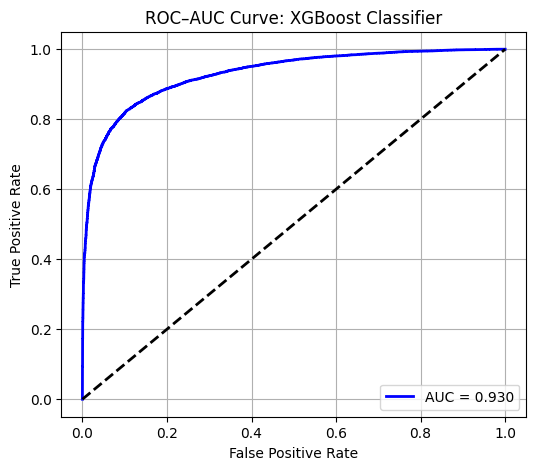

In [51]:
plot_roc_curve(xgb_clf, X_test,y_test,"XGBoost Classifier")

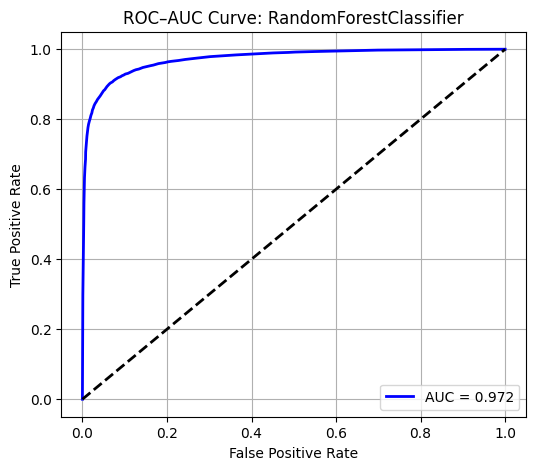

In [52]:
plot_roc_curve(rf_clf,X_test,y_test,"RandomForestClassifier")

In [53]:
import pickle
with open('rf_clf.pkl','wb')as file:
    pickle.dump(rf_clf,file)

REGRESSION TASK- FOR PREDICTING SELLING PRICE 

In [54]:
df_reg = df_trans.copy()

In [55]:
df_reg.shape

(150433, 13)

In [56]:
X = df_reg.drop(['selling_price','material_ref'], axis = 1)
y = df_reg['selling_price']

In [57]:
print(X.dtypes)

quantity tons           float64
country                   int64
status                    int64
item type                 int64
application               int64
thickness               float64
width                   float64
product_ref               int64
item_date_year            Int64
delivery date_year        Int64
material_ref_encoded      int64
dtype: object


In [58]:
for col in X.select_dtypes(include="Int64").columns:    # Handled Int64
    X[col] = X[col].fillna(-1).astype('int64')

In [59]:
#  DECISION TREE REGRESSOR: PREDICTIING SELLING PRICE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test,y_pred)

print("Metrics of DecisionTree Regressor:")
print(f"Mean Absolute Error : {mae:.2f}")
print(f"Mean Squared Error : {mse:.2f}")
print(f"R2_score : {r2:.2f}")

Metrics of DecisionTree Regressor:
Mean Absolute Error : 69.02
Mean Squared Error : 8494.72
R2_score : 0.77


In [60]:
# EXTRA TREE REGRESSOR:
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
etr_model = ExtraTreeRegressor(random_state=42, max_depth=5)
etr_model.fit(X_train, y_train)
y_pred = etr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test,y_pred)

print("Metrics of ExtraTreeRegressor:")
print(f"Mean Absolute Error : {mae:.2f}")
print(f"Mean Squared Error : {mse:.2f}")
print(f"R2_score : {r2:.2f}")

Metrics of ExtraTreeRegressor:
Mean Absolute Error : 84.60
Mean Squared Error : 12613.81
R2_score : 0.67


In [61]:
# XGBOOST REGRESSOR: ML MODEL FOR PREDICTING SELLING_PRICE()
# Import NecessaLibraries/Packages
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split into train and test, Initialize and train the model, make Predictions. 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBRegressor(random_state=42, max_depth=5)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate Performance: Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test,y_pred)

print("Metrics of XGBoost Regressor:")
print(f"Mean Absolute Error : {mae:.2f}")
print(f"Mean Squared Error : {mse:.2f}")
print(f"R2_score : {r2:.2f}")

Metrics of XGBoost Regressor:
Mean Absolute Error : 48.51
Mean Squared Error : 4408.42
R2_score : 0.88


For predicting the Selling_Price(Continuous feature), a Regression task as evaluated above, XGBoost Regressor has a max R2 score of 0.88 (closer to 1) and hence we can infer that it is the best performing model among the three models.

In [62]:
import pickle
with open('xg_boost.pkl','wb')as file:
    pickle.dump(xgb_model,file)